In [168]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [169]:
lr = 0.1
n_epochs = 500
T = 10
N = 1000

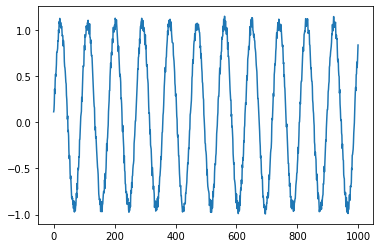

In [170]:
X = np.arange(N)
Y = np.sin(X * 0.07) + np.random.rand(N) * 0.15

plt.plot(Y)

In [171]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device: {device}')

Device: cuda


In [172]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, rnn_num_layers, output_size, device='cpu'):
        super(SimpleRNN, self).__init__()

        self.D = input_size
        self.M = hidden_size
        self.L = rnn_num_layers
        self.K = output_size
        self.device = device

        self.rnn_layer = nn.RNN(
            input_size=self.D,
            hidden_size=self.M,
            num_layers=self.L,
            nonlinearity="relu",
            batch_first=True,
        )
        self.fc = nn.Linear(self.M, self.K)
        
    def forward(self, inputs):
        h0 = torch.zeros(self.L, inputs.size(0), self.M).to(device)

        outputs, _ = self.rnn_layer(inputs, h0)
        
        outputs = self.fc(outputs[:, -1, :])
        
        return outputs

In [173]:
model = SimpleRNN(
    input_size=1,
    hidden_size=5,
    rnn_num_layers=1,
    output_size=1,
    device=device,
)

model.to(device=device)


SimpleRNN(
  (rnn_layer): RNN(1, 5, batch_first=True)
  (fc): Linear(in_features=5, out_features=1, bias=True)
)

In [174]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [175]:
inputs_dataset = np.zeros((N-T, T))
targets_dataset = np.zeros((N-T, 1))

for t in range(N-T):
    inputs_dataset[t] = Y[t:t+T]
    targets_dataset[t] = Y[t+T]

In [176]:
train_inputs = torch.from_numpy(inputs_dataset[:N//2].astype(np.float32)).view(-1, T, 1).to(device=device)
train_targets = torch.from_numpy(targets_dataset[:N//2].astype(np.float32)).view(-1, 1).to(device=device)
test_inputs = torch.from_numpy(inputs_dataset[N//2:].astype(np.float32)).view(-1, T, 1).to(device=device)
test_targets = torch.from_numpy(targets_dataset[N//2:].astype(np.float32)).view(-1, 1).to(device=device)

In [177]:
def train_no_batch(model, criterion, optimizer, n_epochs=500):
    train_losses = np.zeros(n_epochs)
    test_losses = np.zeros(n_epochs)
    
    for it in range(n_epochs):
        optimizer.zero_grad()
        
        outputs = model(train_inputs)
        
        loss = criterion(outputs, train_targets)
        loss.backward()
        
        optimizer.step()
        
        train_losses[it] = loss.item()
        
        test_outputs = model(test_inputs)
        test_losses[it] = criterion(test_outputs, test_targets).item()
        
        print(f'Iteration {it}')
    
    return train_losses, test_losses
        

In [178]:
train_losses, test_losses = train_no_batch(model=model, criterion=criterion, optimizer= optimizer,)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

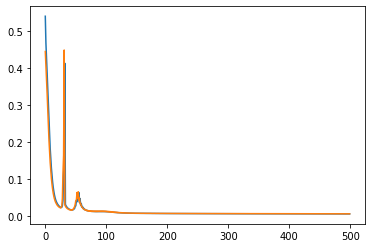

In [179]:
plt.plot(train_losses)
plt.plot(test_losses)

### Wrong way of measuring performance
Since only one prediction is taken at each time

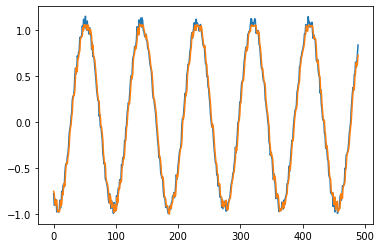

In [180]:
plt.plot(test_targets.cpu().numpy())
plt.plot([model(inputs.view(1,-1,1)).item() for inputs in test_inputs])

### RNN performs poorly on such dataset

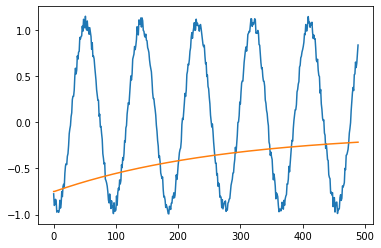

In [181]:
predicted = []
inputs = test_inputs[0]

while len(predicted) < len(test_targets):
    predicted_value = model(inputs.view(1, T, 1))
    
    predicted.append(predicted_value.item())
    
    inputs = torch.concat((inputs[1:], predicted_value))
    
plt.plot(test_targets.cpu().numpy())
plt.plot(predicted)